# Sklearn: K-Nearest Neighbor (KNN)

### Import and configure libraries

In [1]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

# Data modeling libraries
import sklearn
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.model_selection import KFold
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix

# General imports
import math
import warnings
warnings.filterwarnings("ignore")

# Library versions used
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Sklearn version:", sklearn.__version__)

# Configure Seaborn.
sns.set_style("whitegrid")  # Set white background with grid.
sns.set_palette("deep")  # Set color palette.
sns.set_context("paper", font_scale=1.5)  # Set font to scale 1.5 more than normal.

NumPy version: 1.24.1
Pandas version: 1.5.2
Matplotlib version: 3.6.2
Seaborn version: 0.12.2
Sklearn version: 1.0.2


### Load data points from a .csv file and analyze data

In [2]:
train_df = pd.read_csv("./Input/train.csv")
train_df.head()

,Feature1,Feature2,Class
0,-1.133693,-0.700186,1
1,-1.374286,-1.060749,1
2,-0.898012,-0.761521,1
3,-0.363129,-0.567292,1
4,-1.571809,-0.939846,1


In [3]:
train_df.shape

(70, 3)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  70 non-null     float64
 1   Feature2  70 non-null     float64
 2   Class     70 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.8 KB


In [5]:
train_df.describe()

,Feature1,Feature2,Class
count,70.000000,70.000000,70.00000
mean,0.013338,-0.942225,0.50000
std,1.155611,0.831350,0.50361
min,-2.340475,-3.463574,0.00000
25%,-0.948066,-1.277584,0.00000
50%,-0.038218,-0.937682,0.50000
75%,1.180870,-0.603483,1.00000
max,2.075991,1.551083,1.00000


In [6]:
(class1, class2), (class1_count, class2_count) = np.unique(train_df['Class'], return_counts=True)
print(f"Class 1: '{class1}', Count:", class1_count)
print(f"Class 2: '{class2}', Count:", class2_count)

Class 1: '0', Count: 35
Class 2: '1', Count: 35


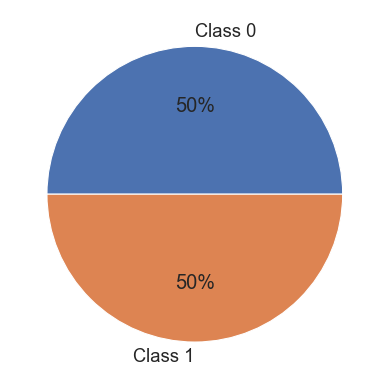

In [7]:
labels = ["Class 0", "Class 1"]
plt.pie(x=[class1_count, class2_count], labels=labels, autopct='%.0f%%')
plt.show()

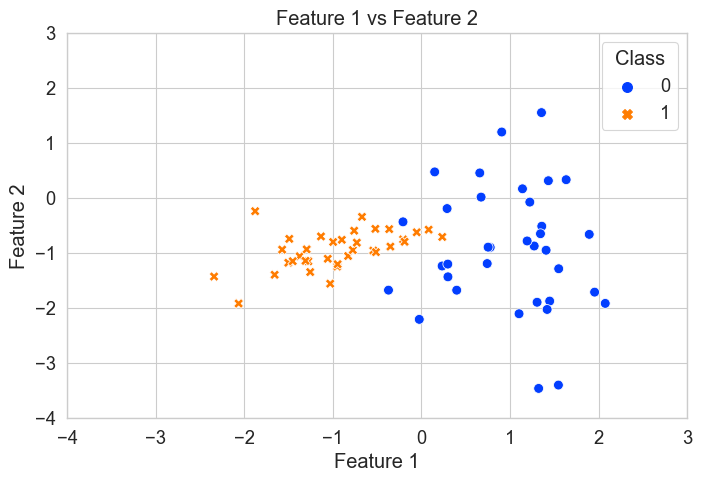

In [8]:
plt.figure(figsize=(8, 5))

sns.scatterplot(
    x="Feature1",
    y="Feature2",
    hue="Class",
    data=train_df,
    palette="bright",
    style="Class",
    markers=["o", "X"],
    size="Class",
    sizes=(50, 50),
)
plt.title("Feature 1 vs Feature 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xticks(ticks=range(-4, 4, 1))
plt.yticks(ticks=range(-4, 4, 1))

plt.savefig("./Output/train-data-points.png")
plt.show()

In [9]:
test_df = pd.read_csv("./Input/test.csv")
test_df.head()
test_df = test_df.round(2)

In [10]:
test_df.describe()

,Feature1,Feature2,Class
count,30.000000,30.000000,30.000000
mean,0.048667,-1.181000,0.500000
std,0.987975,1.044996,0.508548
min,-1.830000,-3.700000,0.000000
25%,-0.520000,-1.405000,0.000000
50%,0.285000,-0.945000,0.500000
75%,0.860000,-0.532500,1.000000
max,1.420000,0.490000,1.000000


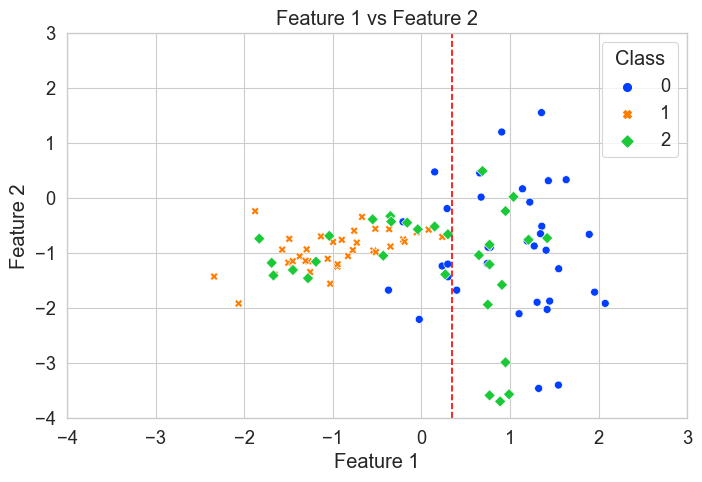

In [11]:
test_df_temp = test_df.copy()
test_df_temp["Class"] = 2

plt.figure(figsize=(8, 5))

sns.scatterplot(
    x="Feature1",
    y="Feature2",
    hue="Class",
    data=pd.concat([train_df, test_df_temp]),
    palette="bright",
    hue_order=[0, 1, 2],
    style="Class",
    markers=["o", "X", "D"],
    size="Class",
    sizes=(33, 33),
)
plt.title("Feature 1 vs Feature 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xticks(ticks=range(-4, 4, 1))
plt.yticks(ticks=range(-4, 4, 1))
plt.axvline(0.35, linestyle="--", color="r")

plt.savefig("./Output/train-n-test-data-points.png")
plt.show()

1. Every green point on right side of the red line belongs to class 0 - Blue.
2. Every green point on left side of the red line belongs to class 1 - Orange.

### Try sklearn.neighbors.KNeighborsClassifier with default K(n_neighbors) value as 5

In [12]:
# Split train data X_train and y_train
X_train = train_df[["Feature1", "Feature2"]]
y_train = train_df["Class"]

# Split test data X_test and y_test
X_test = test_df[["Feature1", "Feature2"]]
y_test = test_df["Class"]

# Define the model: Init K-NN
# p=2 euclidean_distance (l2)
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric="euclidean")
#classifier = KNeighborsClassifier(n_neighbors=5)

# Fit Model
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

#### Calculate accuracy

In [13]:
table = PrettyTable(["Data-Point", "Actual Class", "Predicted Class", "Failed"])

pcl_count = 0
for index, yp in enumerate(y_pred):
    xq = X_test.iloc[index].values
    yq = y_test.iloc[index]

    symbol = "X"
    if yp == yq:
        pcl_count += 1
        symbol = ""

    table.add_row([xq, yq, yp, symbol])
accuracy = pcl_count / len(y_test) * 100
print(table)
print("Accuracy: " + str(round(accuracy, 3)) + "%")

+---------------+--------------+-----------------+--------+
|   Data-Point  | Actual Class | Predicted Class | Failed |
+---------------+--------------+-----------------+--------+
|  [0.69 0.49]  |      0       |        0        |        |
| [ 0.95 -2.99] |      0       |        0        |        |
| [-1.04 -0.69] |      1       |        1        |        |
| [ 0.99 -3.57] |      0       |        0        |        |
|  [1.04 0.02]  |      0       |        0        |        |
| [-0.55 -0.39] |      1       |        1        |        |
| [-1.28 -1.46] |      1       |        1        |        |
| [-1.69 -1.18] |      1       |        1        |        |
| [-0.16 -0.45] |      1       |        1        |        |
| [ 0.91 -1.58] |      0       |        0        |        |
| [-1.83 -0.74] |      1       |        1        |        |
| [-0.04 -0.57] |      1       |        1        |        |
| [ 0.77 -0.85] |      0       |        0        |        |
| [ 1.42 -0.73] |      0       |        

Failure points:<br>
            Data-Point        | Actual Class | Predicted Class | Failed<br>
    [ 0.14552248 -0.5184148 ] |      0       |        1        |   X    |<br>
    [ 0.76594254 -1.2104025 ] |      1       |        0        |   X    |<br>
    

#### Train Error

In [14]:
def KNN(k, X_train, y_train, X_test, y_test):
    # Define the model: Init K-NN.
    classifier = KNeighborsClassifier(n_neighbors=k, p=2, metric="euclidean")

    # Fit Model.
    classifier.fit(X_train, y_train)

    # Predict the test set results.
    y_pred = classifier.predict(X_test)

    n2 = len(X_test)
    # Correct prediction count.
    pcl_count = 0
    for index, yq in enumerate(y_pred):
        if yq == y_test[index]:
            pcl_count += 1

    return pcl_count / n2

In [15]:
X_train = train_df[["Feature1", "Feature2"]]
y_train = train_df["Class"]

n1 = len(X_train)
train_errs = []
for k in range(1, n1 + 1):
    acc = KNN(k, X_train, y_train, X_train, y_train)
    train_errs.append(1 - acc)

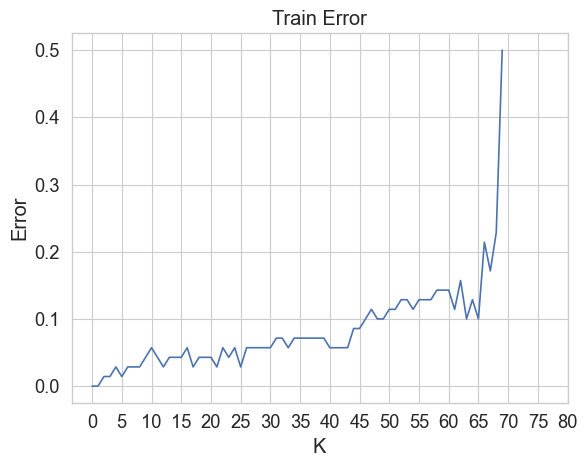

In [16]:
sns.lineplot(data=train_errs)
plt.title("Train Error")
plt.xlabel("K")
plt.ylabel("Error")
plt.xticks(ticks=range(0, 81, 5))
plt.savefig("./Output/train-error.png")
plt.show()

#### K-Fold Cross validation

In [17]:
X = train_df[["Feature1", "Feature1"]].values
y = train_df["Class"].values
splits = 10

kf = KFold(n_splits=splits)

n = math.floor((1 - 1 / splits) * len(X))
test_errs = []
for k in range(1, n + 1):
    accs = []
    for train_idx, cross_idx in kf.split(X):
        X_train, X_cross = X[train_idx], X[cross_idx]
        y_train, y_cross = y[train_idx], y[cross_idx]

        acc = KNN(k, X_train, y_train, X_cross, y_cross)
        accs.append(acc)
    test_errs.append(1 - np.mean(accs))

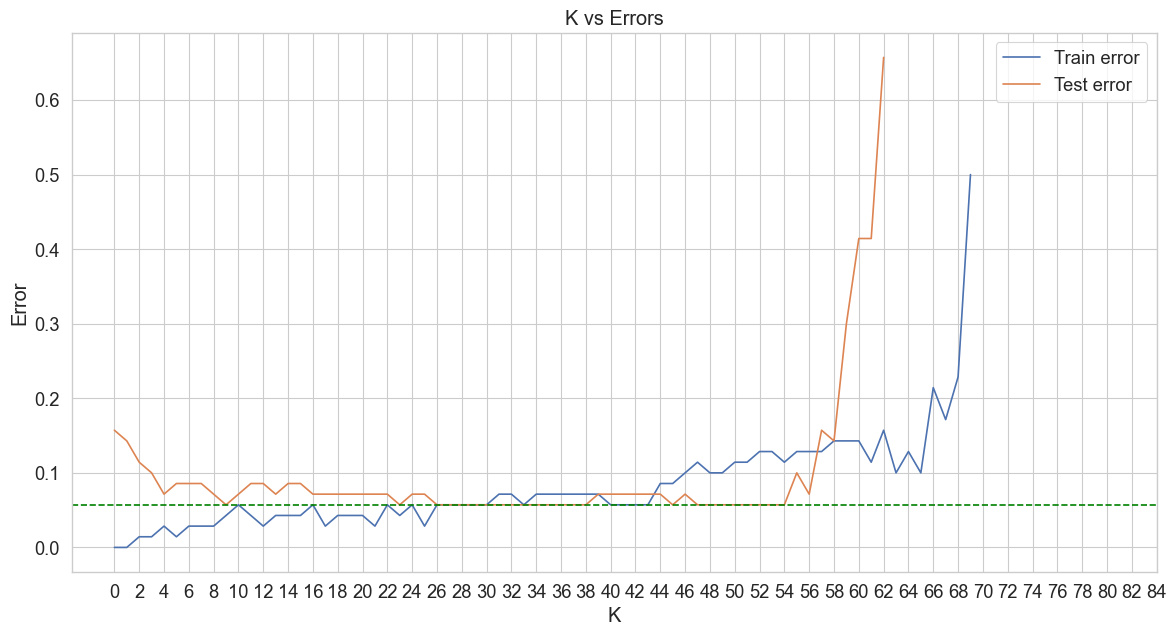

In [18]:
plt.figure(figsize=(14, 7))

sns.lineplot(data=train_errs, label="Train error")
sns.lineplot(data=test_errs, label="Test error")
plt.title("K vs Errors")
plt.xlabel("K")
plt.ylabel("Error")
plt.xticks(ticks=range(0, 85, 2))
plt.axhline(min(test_errs), linestyle="--", color="g")
plt.savefig("./Output/train-n-test-errors.png")
plt.show()

#### Local outlier factor (LOF)


In [19]:
def top_K_outliers(items, K=5):
    max_lof_val = 0
    max_lof_idx = 0
        
    lofs = [{"idx": idx, "val": round(item, 4)} for idx, item in enumerate(items)]

    return sorted(lofs, key=lambda lof: lof["val"])[:K]

In [20]:
X = train_df[["Feature1", "Feature1"]].values

clf = LocalOutlierFactor(n_neighbors=5)
clf.fit_predict(X)

nof = clf.negative_outlier_factor_
outliers = top_K_outliers(nof)
outliers

[{'idx': 19, 'val': -2.733},
 {'idx': 47, 'val': -2.2954},
 {'idx': 39, 'val': -2.1735},
 {'idx': 28, 'val': -2.0294},
 {'idx': 10, 'val': -1.9306}]

#### Top five Outliers

In [21]:
fltr = [loa["idx"] for loa in outliers]  # Filter
train_df.iloc[fltr]  # Apply filter

,Feature1,Feature2,Class
19,-2.340475,-1.429467,1
47,2.075991,-1.917705,0
39,-2.063410,-1.919613,1
28,1.955931,-1.713009,0
10,1.634785,0.331274,0


### Performance Measurement

#### 1. Confusion Matrix

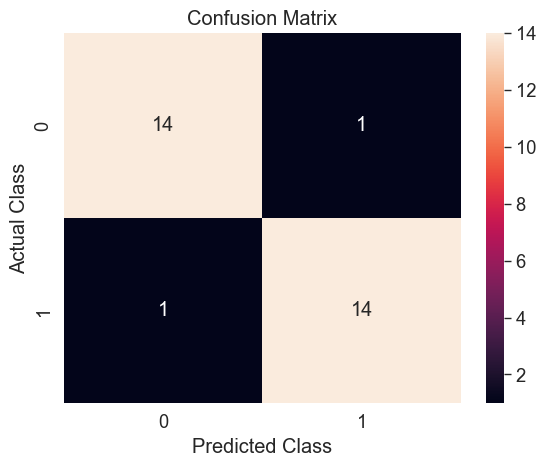

In [22]:
cm=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted Class');ax.set_ylabel('Actual Class'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0,1]);

#### 2. Report(Precision, Recall, F1-Score, Accuracy)

In [23]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
0,0.933333,0.933333,0.933333,15.000000
1,0.933333,0.933333,0.933333,15.000000
accuracy,0.933333,0.933333,0.933333,0.933333
macro avg,0.933333,0.933333,0.933333,30.000000
weighted avg,0.933333,0.933333,0.933333,30.000000
